In [1]:
# Importing all the dependencies
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load dataset
df =  pd.read_csv("Mobile_Price_dataset.csv")

In [5]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#Define the model 
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

In [8]:
# Grid search for best hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [9]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

In [10]:
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


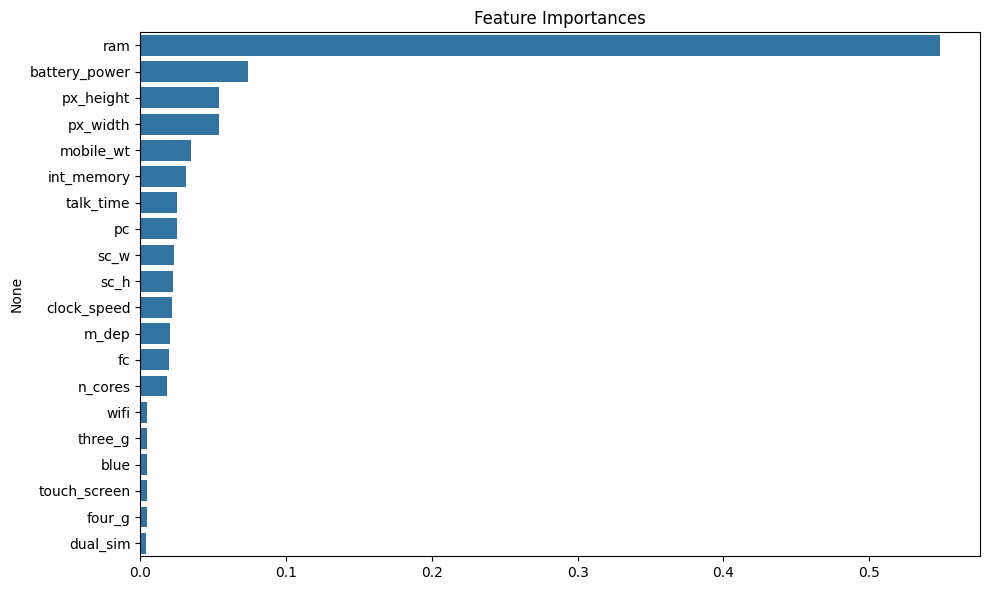

In [24]:
# Plot feature importances
importances = best_model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig("feature_importance")
plt.show()

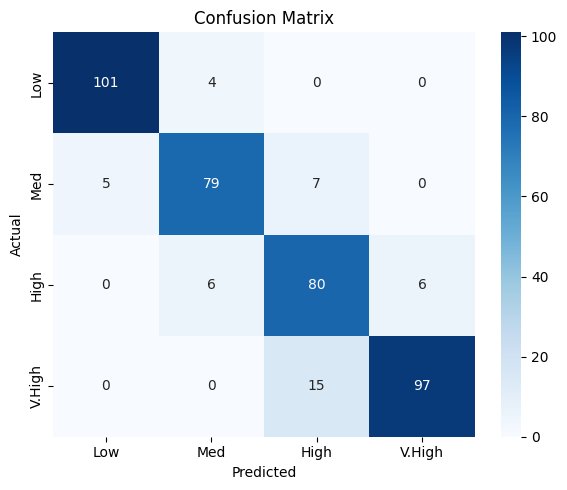

In [21]:
# 5. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Med", "High", "V.High"],
            yticklabels=["Low", "Med", "High", "V.High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [25]:
# Evaluate
y_pred = best_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Test Accuracy:", acc)
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
✅ Test Accuracy: 0.8925
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.86      0.87        91
           2       0.81      0.85      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [26]:
# Save model and scaler
joblib.dump(best_model, "mobile_price_predictor.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']